# 概览

## 1. 客户价值分析

- 根据RFM模型将客户分为高价值、中价值和低价值三类:
  - 高价值客户: 29.06%
  - 中价值客户: 27.21%
  - 低价值客户: 43.73%

- 高价值客户的平均指标:
  - 购买频率: 47.37次
  - 总购买金额: 6,790,102元  
  - 平均订单金额: 143,898元

- 高价值客户地理分布前三省份:
  1. 江苏省(52人)
  2. 广东省(32人)
  3. 浙江省(26人)

## 2. 客户购买行为分析  

- 客户购买品类偏好:
  - 护肤品: 85.09%
  - 彩妆: 14.91%

- 客户复购率: 99.91%

- 季节性购买模式:
  1. 第四季度(销售额最高)
  2. 第一季度
  3. 第二季度
  4. 第三季度(销售额最低)

## 3. 客户增长趋势分析

- 月度新增客户数量呈波动上升趋势,2022年下半年增长明显。

- 客户留存率:
  - 1个月后: 66.16%
  - 3个月后: 58.89% 
  - 6个月后: 64.30%
  - 整体保持在60%左右,留存情况较好。

## 4. 建议

1. 针对高价值客户制定个性化营销方案,提高其忠诚度。
2. 加大对护肤品品类的投入,同时尝试提升彩妆品类销量。
3. 针对第三季度销售淡季制定促销策略。
4. 继续保持良好的客户留存,通过会员制等方式提高客户粘性。

## 总结

总体来看,该日化品牌客户质量较高,具有较强的客户粘性和稳定性。建议在维护现有客户的基础上,进一步扩大客户规模,提升品牌影响力。

# 数据读取

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 用来正常显示中文标签
plt.rcParams['figure.figsize']=[16,12] 
pd.set_option('display.max_columns', 80) 
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline



In [2]:
# 读取数据
products_df = pd.read_excel('./data/日化.xlsx', sheet_name='商品信息表')
orders_df = pd.read_excel('./data/日化.xlsx', sheet_name='销售订单表')

In [3]:
products_df.head()

,商品编号,商品名称,商品小类,商品大类,销售单价
0,X001,商品1,面膜,护肤品,121
1,X002,商品2,面膜,护肤品,141
2,X003,商品3,面膜,护肤品,168
3,X004,商品4,面膜,护肤品,211
4,X005,商品5,面膜,护肤品,185


# 数据清洗与合并 

In [144]:
# 检查重复值（完全一致才判断为重复）
print(products_df.duplicated().sum())
print(orders_df.duplicated().sum())

# 删除重复值
products_df.drop_duplicates(inplace=True)
orders_df.drop_duplicates(inplace=True)

# 检查重复值
print(products_df.duplicated().sum())
print(orders_df.duplicated().sum())


0
6
0
0


In [145]:
# 数据清洗
# 检查缺失值
print(products_df.isnull().sum())
print(orders_df.isnull().sum())
# 打印 orders_df 中有缺失值的行
print(orders_df[orders_df.isnull().any(axis=1)])

# 处理缺失值
# 删除缺失值
orders_df.dropna(inplace=True)

# 检查缺失值
print(orders_df.isnull().sum())



商品编号    0
商品名称    0
商品小类    0
商品大类    0
销售单价    0
dtype: int64
订单编码    0
订单日期    0
客户编码    0
所在区域    2
所在省份    2
所在地市    0
商品编号    1
订购数量    2
订购单价    4
金额      4
dtype: int64
         订单编码                 订单日期    客户编码 所在区域 所在省份 所在地市  商品编号  订购数量 订购单价  \
9718   D25844  2019-02-27 00:00:00  S14821  NaN  江苏省  扬州市  X045   538  205   
9726   D26806  2019-02-23 00:00:00  S16365  NaN  广东省  湛江市  X022  1542  158   
9781   D22734  2019-02-23 00:00:00  S12453   南区  NaN  广州市  X103  1067  202   
9978   D26028  2019-07-13 00:00:00  S15878   北区  NaN  北京市  X022  1317  158   
25029  D22086  2019-09-11 00:00:00  S22887   南区  江西省  九江市  X011  1698  NaN   
25030  D23111  2019-04-22 00:00:00  S10909   东区  浙江省  温州市  X096   804  NaN   
31444  D38486  2019-09-15 00:00:00  S12592   东区  浙江省  杭州市   NaN   NaN  NaN   
31445  D31856  2019-07-12 00:00:00  S17476   东区  湖北省  武汉市  X019   NaN  NaN   

             金额  
9718   110290.0  
9726   243636.0  
9781   215534.0  
9978   208086.0  
25029       NaN  
25030       N

In [148]:
print(orders_df['订单日期'])
from dateutil import parser
# 确保 '订单日期' 列为字符串类型
orders_df['订单日期'] = orders_df['订单日期'].astype(str)

orders_df['订单日期'] = orders_df['订单日期'].str.replace('#', '-')
def parse_date(date_str):
    try:
        return parser.parse(date_str)
    except ValueError:
        return pd.NaT
orders_df['订单日期'] = orders_df['订单日期'].apply(parse_date)

# 检查转换结果
orders_df['订单日期']


0        2019-05-16 00:00:00
1        2019-05-14 00:00:00
2        2019-08-26 00:00:00
3        2019-04-08 00:00:00
4        2019-04-11 00:00:00
                ...         
31439    2019-04-16 00:00:00
31440    2019-05-03 00:00:00
31441               2019#3#3
31442    2019-09-27 00:00:00
31443    2019-08-06 00:00:00
Name: 订单日期, Length: 31438, dtype: object


0       2019-05-16
1       2019-05-14
2       2019-08-26
3       2019-04-08
4       2019-04-11
           ...    
31439   2019-04-16
31440   2019-05-03
31441   2019-03-03
31442   2019-09-27
31443   2019-08-06
Name: 订单日期, Length: 31438, dtype: datetime64[ns]

In [149]:
# 数据合并
merged_df = pd.merge(orders_df, products_df, on='商品编号')

In [150]:
merged_df.head()

,订单编码,订单日期,客户编码,所在区域,所在省份,所在地市,商品编号,订购数量,订购单价,金额,商品名称,商品小类,商品大类,销售单价
0,D31313,2019-05-16,S22796,东区,浙江省,台州市,X091,892,214,190888.0,商品91,粉底,彩妆,214
1,D21329,2019-05-14,S11460,东区,安徽省,宿州市,X005,276,185,51060.0,商品5,面膜,护肤品,185
2,D22372,2019-08-26,S11101,北区,山西省,忻州市,X078,1450,116,168200.0,商品78,口红,彩妆,116
3,D31078,2019-04-08,S10902,北区,吉林省,延边朝鲜族自治州,X025,1834,102,187068.0,商品25,眼霜,护肤品,102
4,D32470,2019-04-11,S18696,北区,北京市,北京市,X010,887,58,51446.0,商品10,面膜,护肤品,58


# EDA

## 销售分析

In [151]:
# 异常值处理
# 打印出 merge_df 中订单日期超过 2019 年的所有订单并删除这些记录
orders_after_2019 = merged_df[merged_df['订单日期'] > '2019-12-31']
print(orders_after_2019)

# 删除订单日期超过 2019 年的记录
merged_df = merged_df[merged_df['订单日期'] <= '2019-12-31']

         订单编码       订单日期    客户编码 所在区域 所在省份  所在地市  商品编号 订购数量 订购单价        金额  \
20792  D26533 2050-06-09  S21396   北区  河北省  石家庄市  X022  759  158  119922.0   

       商品名称 商品小类 商品大类  销售单价  
20792  商品22   眼霜  护肤品   158  


In [152]:
# 销售总额分析
sales_summary = merged_df.groupby('商品名称')['金额'].sum().reset_index()
sales_summary = sales_summary.sort_values(by='金额', ascending=False)

# 销售趋势分析
monthly_sales = merged_df.resample('M', on='订单日期')['金额'].sum()


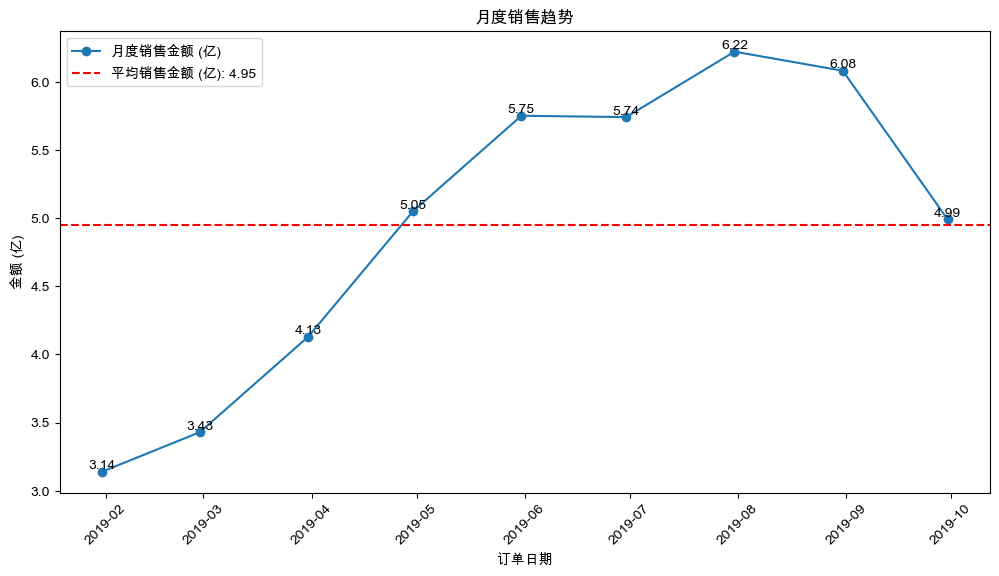

In [153]:
import matplotlib.pyplot as plt

# 按月分析销售趋势
monthly_sales = merged_df.resample('M', on='订单日期')['金额'].sum().reset_index()

# 将金额转换为以亿为单位，并保留两位小数
monthly_sales['金额'] = (monthly_sales['金额'] / 100000000).round(2)

# 计算平均销售金额
average_sales = monthly_sales['金额'].mean()

# 绘制销售趋势图
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['订单日期'], monthly_sales['金额'], marker='o', label='月度销售金额 (亿)')
plt.axhline(y=average_sales, color='r', linestyle='--', label=f'平均销售金额 (亿): {average_sales:.2f}')
plt.title('月度销售趋势')
plt.xlabel('订单日期')
plt.ylabel('金额 (亿)')
plt.xticks(rotation=45)
plt.legend()

# 标注每个点的数值
for i in range(len(monthly_sales)):
    plt.text(monthly_sales['订单日期'][i], monthly_sales['金额'][i], f'{monthly_sales["金额"][i]:.2f}', ha='center', va='bottom')

plt.show()





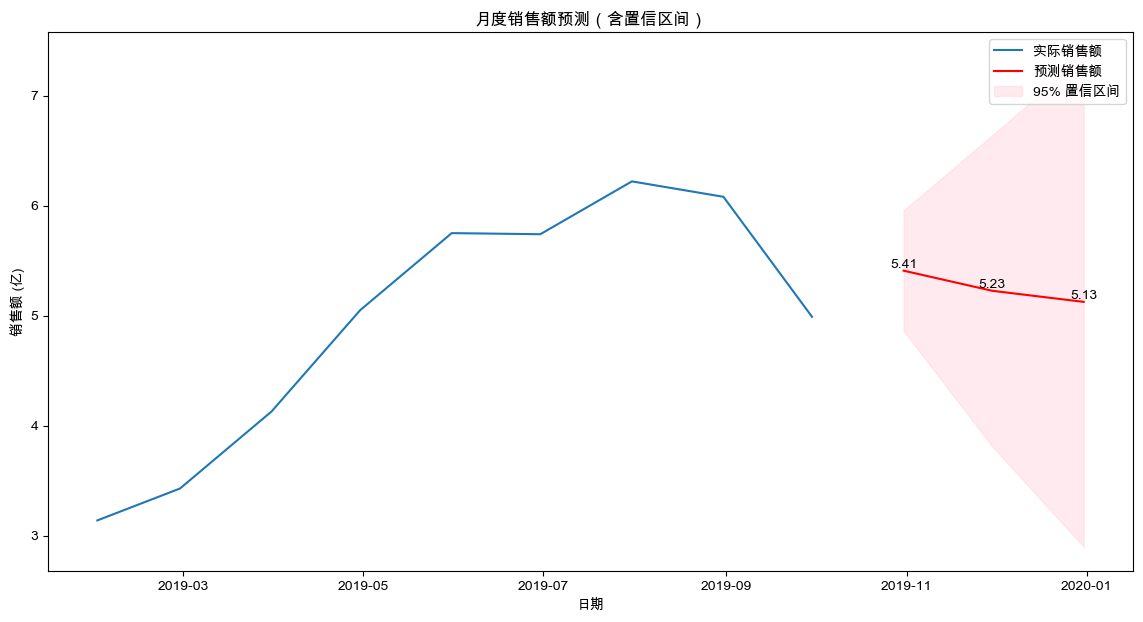


未来3个月的销售额预测:
2019-10: 5.41亿
2019-11: 5.23亿
2019-12: 5.13亿

预测的95%置信区间:
2019-10: 4.86亿 - 5.95亿
2019-11: 3.81亿 - 6.64亿
2019-12: 2.90亿 - 7.35亿

模型评估指标:
均方误差 (MSE): 0.4685
均方根误差 (RMSE): 0.6844
平均绝对误差 (MAE): 0.6001
平均绝对百分比误差 (MAPE): 9.93%


In [154]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import pandas as pd

# 准备数据
monthly_sales_series = monthly_sales.set_index('订单日期')['金额']

# 获取最后一个有实际数据的月份
last_actual_date = monthly_sales_series.index[-1]

# 分割数据集，使用最后3个月作为测试集
train = monthly_sales_series[:-3]
test = monthly_sales_series[-3:]

# 构建ARIMA模型
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

# 对测试集进行预测
forecast = model_fit.forecast(steps=3)

# 计算评估指标
mse = mean_squared_error(test, forecast)
rmse = sqrt(mse)
mae = mean_absolute_error(test, forecast)
mape = np.mean(np.abs((test - forecast) / test)) * 100

# 预测未来3个月的销售额
future_dates = pd.date_range(start=last_actual_date + pd.DateOffset(months=1), periods=3, freq='M')
forecast_result = model_fit.get_forecast(steps=3)
future_forecast = forecast_result.predicted_mean
forecast_ci = forecast_result.conf_int()

# 绘制预测结果
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales_series.index, monthly_sales_series, label='实际销售额')
plt.plot(future_dates, future_forecast, color='red', label='预测销售额')
plt.fill_between(future_dates, 
                 forecast_ci.iloc[:, 0], 
                 forecast_ci.iloc[:, 1], 
                 color='pink', alpha=0.3, label='95% 置信区间')
plt.title('月度销售额预测（含置信区间）')
plt.xlabel('日期')
plt.ylabel('销售额 (亿)')
plt.legend()

# 添加预测值标注
for i, v in enumerate(future_forecast):
    plt.text(future_dates[i], v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

# 输出预测结果
print("\n未来3个月的销售额预测:")
for date, value in zip(future_dates, future_forecast):
    print(f"{date.strftime('%Y-%m')}: {value:.2f}亿")

print("\n预测的95%置信区间:")
for date, (lower, upper) in zip(future_dates, forecast_ci.values):
    print(f"{date.strftime('%Y-%m')}: {lower:.2f}亿 - {upper:.2f}亿")

# 输出模型评估指标
print("\n模型评估指标:")
print(f"均方误差 (MSE): {mse:.4f}")
print(f"均方根误差 (RMSE): {rmse:.4f}")
print(f"平均绝对误差 (MAE): {mae:.4f}")
print(f"平均绝对百分比误差 (MAPE): {mape:.2f}%")


In [155]:
from pyecharts.charts import Bar
from pyecharts import options as opts

top_10_sales = sales_summary.head(10)

# 将金额转换为以万为单位，并保留一位小数
top_10_sales['金额'] = (top_10_sales['金额'] / 10000).round(1)

bar = (
    Bar()
    .add_xaxis(top_10_sales['商品名称'].tolist())
    .add_yaxis("金额 (万)", top_10_sales['金额'].tolist(), label_opts=opts.LabelOpts(formatter="{@[1]}万"))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Top 10 商品销售总额"),
        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=45)),
        yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(formatter="{value}万"))
    )
)

bar.render_notebook()


## 客户分析

### 1. 客户地理分布分析
- 按省份统计客户数量和销售额
- 按区域统计客户数量和销售额
- 使用地图可视化展示客户分布

### 2. 客户价值分析
- 计算每个客户的总购买金额、购买频率和平均订单金额
- 使用RFM模型进行客户分层
  - R (Recency): 最近一次购买时间
  - F (Frequency): 购买频率
  - M (Monetary): 购买金额
- 根据RFM得分将客户分为高价值、中价值和低价值客户

### 3. 客户购买行为分析
- 分析客户的购买品类偏好
- 计算客户的复购率
- 分析客户的季节性购买模式

### 4. 客户增长趋势分析
- 按月统计新增客户数量
- 计算客户留存率

### 5. 客户画像
- 根据以上分析结果，总结典型客户特征
- 为不同类型的客户制定营销策略建议

### 6. 可视化展示
- 使用适当的图表（如柱状图、饼图、热力图等）展示分析结果
- 考虑使用交互式图表增强数据可视化效果

In [156]:
# 1. 客户地理分布分析

# 按省份统计客户数量和销售额
province_stats = merged_df.groupby('所在省份').agg({
    '客户编码': 'nunique',
    '金额': 'sum'
}).reset_index()
province_stats.columns = ['省份', '客户数量', '销售额']
province_stats['销售额'] = province_stats['销售额'] / 100000000  # 转换为亿元
province_stats['销售额'] = province_stats['销售额'].round(2)  # 保留两位小数
province_stats = province_stats.sort_values('销售额', ascending=False)

print("按省份统计的客户数量和销售额：")
print(province_stats)

# 按区域统计客户数量和销售额
region_stats = merged_df.groupby('所在区域').agg({
    '客户编码': 'nunique',
    '金额': 'sum'
}).reset_index()
region_stats.columns = ['区域', '客户数量', '销售额']
region_stats['销售额'] = region_stats['销售额'] / 100000000  # 转换为亿元
region_stats['销售额'] = region_stats['销售额'].round(2)  # 保留两位小数
region_stats = region_stats.sort_values('销售额', ascending=False)

print("\n按区域统计的客户数量和销售额：")
print(region_stats)

# 使用地图可视化展示客户分布
from pyecharts import options as opts
from pyecharts.charts import Map

# 准备数据
province_data = [list(z) for z in zip(province_stats['省份'], province_stats['客户数量'])]

# 创建地图
map_chart = (
    Map()
    .add("客户数量", province_data, "china")
    .set_global_opts(
        title_opts=opts.TitleOpts(title="客户地理分布"),
        visualmap_opts=opts.VisualMapOpts(max_=province_stats['客户数量'].max(), is_piecewise=True),
    )
)

# 渲染地图
map_chart.render_notebook()




按省份统计的客户数量和销售额：
          省份  客户数量   销售额
14       江苏省   150  6.70
11       广东省   121  4.75
18       浙江省    92  3.74
23       福建省    57  2.53
8        安徽省    48  2.16
5        四川省    58  2.16
21       湖南省    53  2.11
9        山东省    53  2.00
0        上海市    44  1.84
16       河北省    35  1.52
15       江西省    39  1.47
12   广西壮族自治区    36  1.46
20       湖北省    39  1.45
26       重庆市    31  1.27
1        云南省    29  1.11
27       陕西省    25  1.03
25       辽宁省    21  0.94
3        北京市    23  0.90
17       河南省    23  0.88
10       山西省    16  0.85
24       贵州省    19  0.75
28      黑龙江省    16  0.74
4        吉林省    12  0.56
22       甘肃省    14  0.46
13  新疆维吾尔自治区     8  0.32
6        天津市     7  0.26
19       海南省     6  0.21
2     内蒙古自治区     4  0.20
7    宁夏回族自治区     5  0.16

按区域统计的客户数量和销售额：
    区域  客户数量    销售额
0   东区   373  15.88
2   南区   312  12.53
1   北区   210   8.85
5   西区   189   5.68
4  西 区   184   1.58
3   男区     1   0.00


客户分层统计：
    客户分层   数量        占比
0  低价值客户  474  0.437269
1  高价值客户  315  0.290590
2  中价值客户  295  0.272140


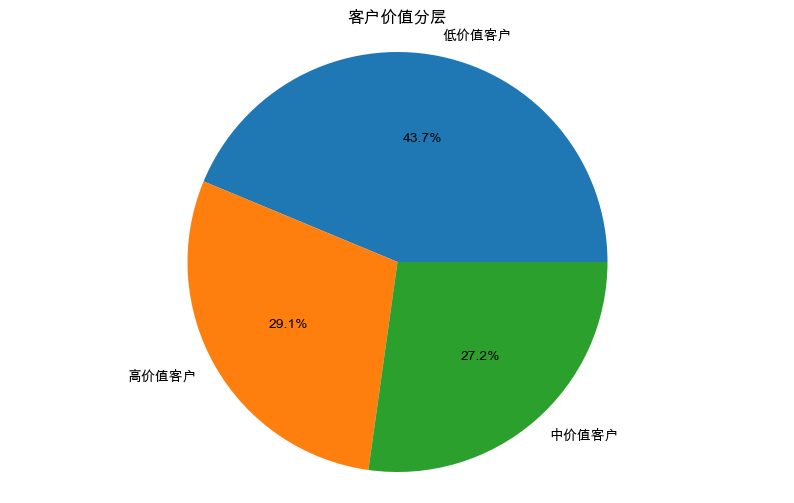


高价值客户的平均指标：
购买频率      4.736825e+01
总购买金额     6.790102e+06
平均订单金额    1.438984e+05
dtype: float64


In [157]:
# 2. 客户价值分析

# 计算每个客户的总购买金额、购买频率和平均订单金额
customer_stats = merged_df.groupby('客户编码').agg({
    '订单编码': 'count',
    '金额': ['sum', 'mean'],
    '订单日期': 'max'
}).reset_index()

customer_stats.columns = ['客户编码', '购买频率', '总购买金额', '平均订单金额', '最近购买日期']

# 计算RFM指标
current_date = merged_df['订单日期'].max()
customer_stats['R'] = (current_date - customer_stats['最近购买日期']).dt.days
customer_stats['F'] = customer_stats['购买频率']
customer_stats['M'] = customer_stats['总购买金额']

# 对RFM指标进行评分（1-5分）
for col in ['R', 'F', 'M']:
    customer_stats[f'{col}_score'] = pd.qcut(customer_stats[col], q=5, labels=False) + 1
    if col == 'R':
        customer_stats[f'{col}_score'] = 6 - customer_stats[f'{col}_score']  # R分数需要反转

# 计算RFM总分
customer_stats['RFM_score'] = customer_stats['R_score'] + customer_stats['F_score'] + customer_stats['M_score']

# 根据RFM总分进行客户分层
def classify_customer(score):
    if score >= 12:
        return '高价值客户'
    elif score >= 9:
        return '中价值客户'
    else:
        return '低价值客户'

customer_stats['客户分层'] = customer_stats['RFM_score'].apply(classify_customer)

# 统计各类客户的数量和占比
customer_segments = customer_stats['客户分层'].value_counts().reset_index()
customer_segments.columns = ['客户分层', '数量']
customer_segments['占比'] = customer_segments['数量'] / customer_segments['数量'].sum()

print("客户分层统计：")
print(customer_segments)

# 可视化客户分层
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.pie(customer_segments['数量'], labels=customer_segments['客户分层'], autopct='%1.1f%%')
plt.title('客户价值分层')
plt.axis('equal')
plt.show()

# 分析高价值客户的特征
high_value_customers = customer_stats[customer_stats['客户分层'] == '高价值客户']

print("\n高价值客户的平均指标：")
print(high_value_customers[['购买频率', '总购买金额', '平均订单金额']].mean())

# 高价值客户的地理分布
high_value_geo = merged_df[merged_df['客户编码'].isin(high_value_customers['客户编码'])][['客户编码', '所在省份']].drop_duplicates()
high_value_geo_stats = high_value_geo['所在省份'].value_counts().reset_index()
high_value_geo_stats.columns = ['省份', '高价值客户数量']

# 使用地图可视化高价值客户分布
high_value_map_data = [list(z) for z in zip(high_value_geo_stats['省份'], high_value_geo_stats['高价值客户数量'])]

high_value_map = (
    Map()
    .add("高价值客户数量", high_value_map_data, "china")
    .set_global_opts(
        title_opts=opts.TitleOpts(title="高价值客户地理分布"),
        visualmap_opts=opts.VisualMapOpts(max_=high_value_geo_stats['高价值客户数量'].max(), is_piecewise=True),
    )
)

high_value_map.render_notebook()



客户购买品类偏好（平均比例）：
商品大类
彩妆     0.149125
护肤品    0.850875
dtype: float64


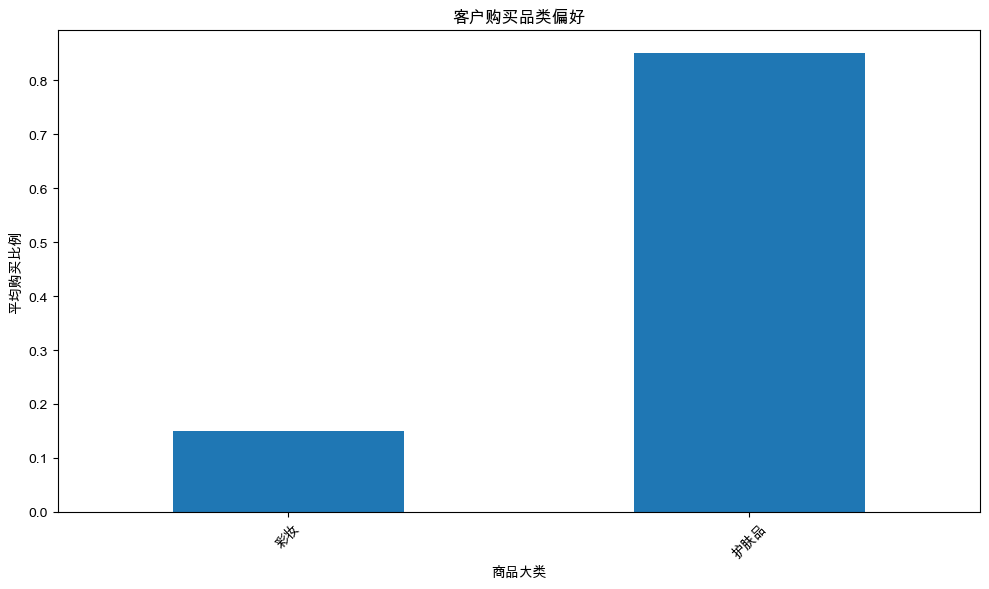


客户复购率: 99.91%


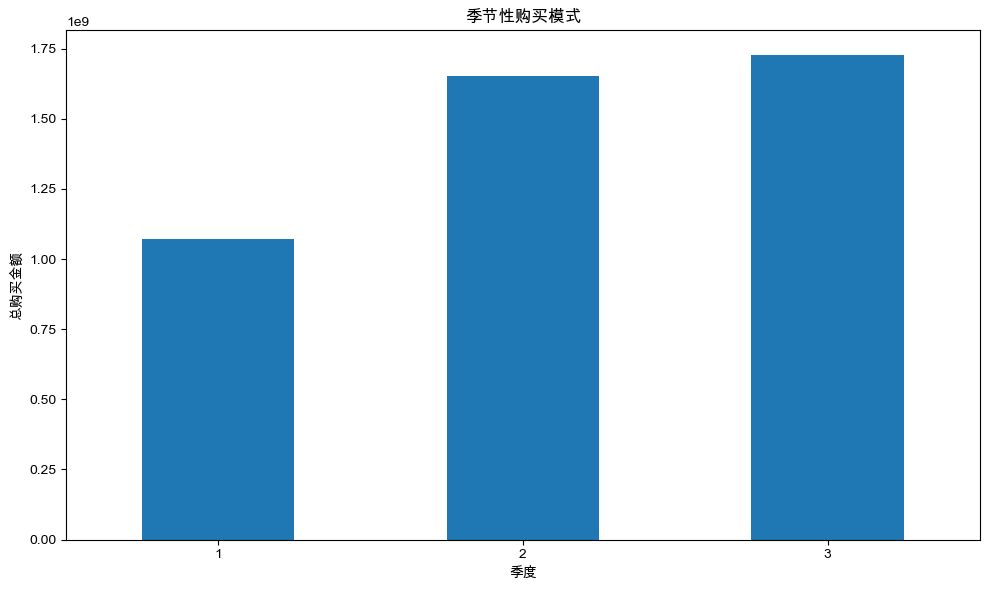

In [158]:
# 3. 客户购买行为分析

# 分析客户的购买品类偏好
customer_category_preference = merged_df.groupby('客户编码')['商品大类'].value_counts().unstack(fill_value=0)
customer_category_preference = customer_category_preference.div(customer_category_preference.sum(axis=1), axis=0)

print("客户购买品类偏好（平均比例）：")
print(customer_category_preference.mean())

# 可视化客户购买品类偏好
plt.figure(figsize=(10, 6))
customer_category_preference.mean().plot(kind='bar')
plt.title('客户购买品类偏好')
plt.xlabel('商品大类')
plt.ylabel('平均购买比例')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 计算客户的复购率
total_customers = merged_df['客户编码'].nunique()
repeat_customers = merged_df.groupby('客户编码').size()
repeat_customers = repeat_customers[repeat_customers > 1].count()
repurchase_rate = repeat_customers / total_customers

print(f"\n客户复购率: {repurchase_rate:.2%}")

# 分析客户的季节性购买模式
merged_df['季度'] = merged_df['订单日期'].dt.quarter
seasonal_purchases = merged_df.groupby('季度')['金额'].sum()

plt.figure(figsize=(10, 6))
seasonal_purchases.plot(kind='bar')
plt.title('季节性购买模式')
plt.xlabel('季度')
plt.ylabel('总购买金额')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()




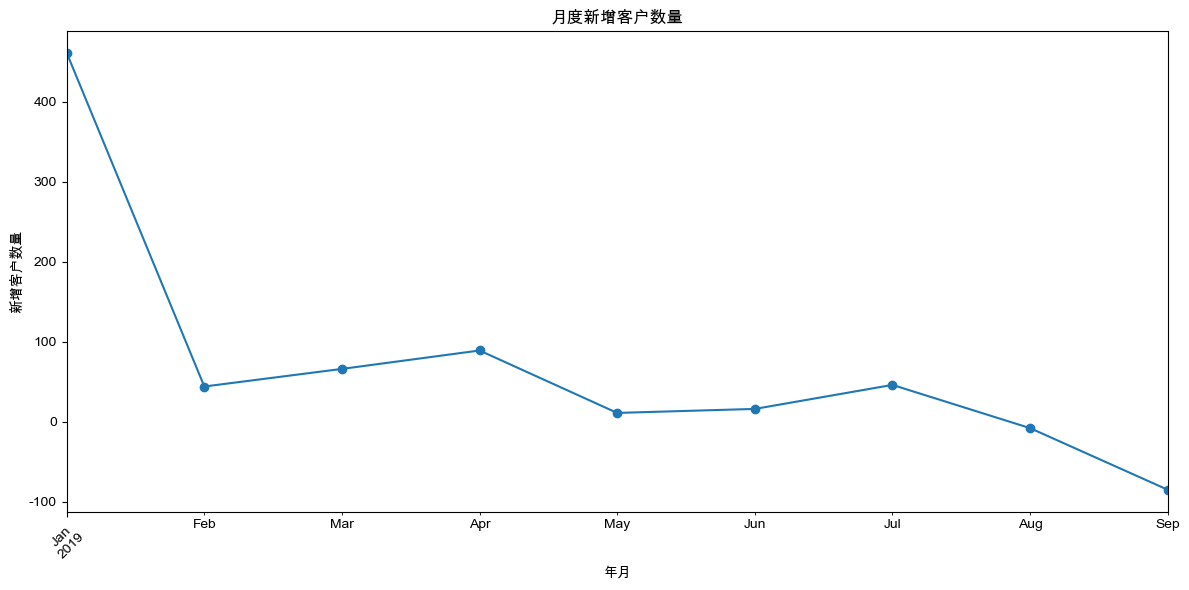

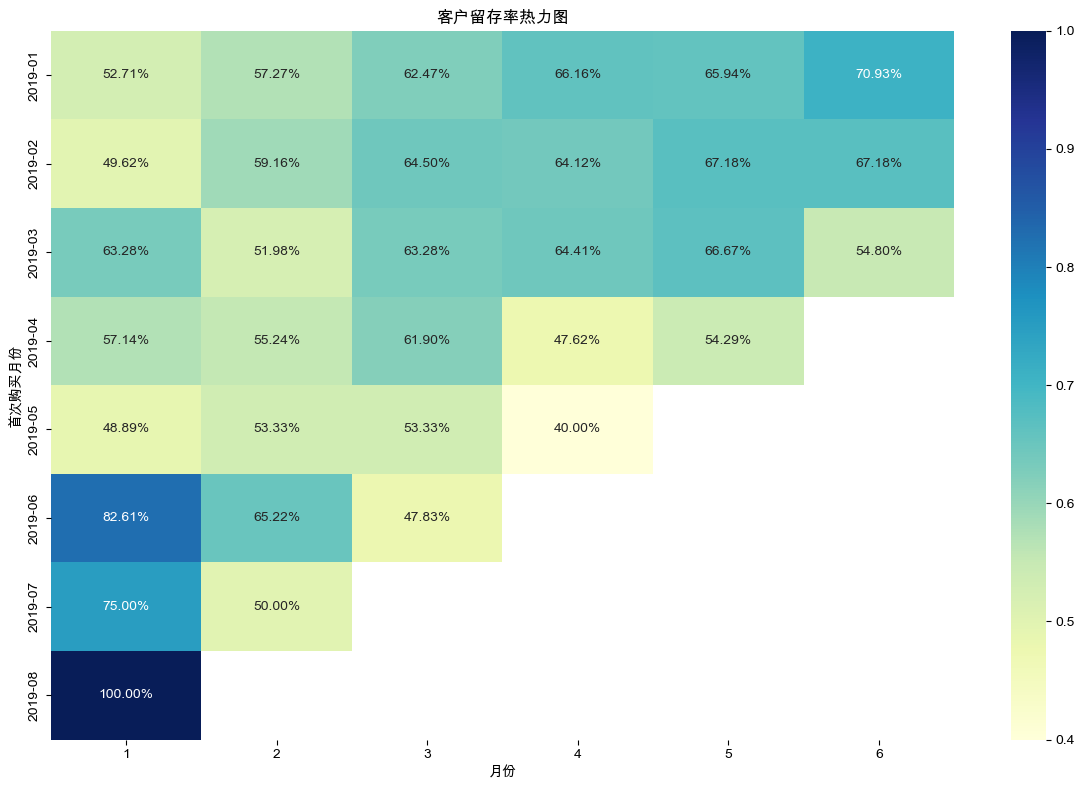


平均客户留存率：
月份差
1    0.661559
2    0.560276
3    0.588863
4    0.564617
5    0.635179
6    0.643035
dtype: float64


In [159]:
# 4. 客户增长趋势分析

# 按月统计新增客户数量
merged_df['年月'] = merged_df['订单日期'].dt.to_period('M')
new_customers = merged_df.groupby('年月')['客户编码'].nunique().diff().fillna(merged_df.groupby('年月')['客户编码'].nunique().iloc[0])

plt.figure(figsize=(12, 6))
new_customers.plot(kind='line', marker='o')
plt.title('月度新增客户数量')
plt.xlabel('年月')
plt.ylabel('新增客户数量')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 计算客户留存率
def calculate_retention_rate(df, periods):
    cohort = df.groupby('客户编码')['年月'].min().reset_index()
    cohort.columns = ['客户编码', '首次购买月份']
    df = df.merge(cohort, on='客户编码')
    df['月份差'] = (df['年月'] - df['首次购买月份']).apply(lambda x: x.n)
    cohort_size = cohort.groupby('首次购买月份').size()
    retention = df.groupby(['首次购买月份', '月份差'])['客户编码'].nunique().unstack()
    
    retention_rate = retention.divide(cohort_size, axis=0)
    return retention_rate.iloc[:, 1:periods+1]

retention_rate = calculate_retention_rate(merged_df, 6)

plt.figure(figsize=(12, 8))
sns.heatmap(retention_rate, annot=True, fmt='.2%', cmap='YlGnBu')
plt.title('客户留存率热力图')
plt.xlabel('月份')
plt.ylabel('首次购买月份')
plt.tight_layout()
plt.show()

print("\n平均客户留存率：")
print(retention_rate.mean())